## Spam detector

#### Imports

In [29]:
import numpy as np
import pandas as pd
import os
import re
import itertools
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#### Get  data

Data : https://spamassassin.apache.org/old/publiccorpus/

In [3]:
easy_ham_path = './easy_ham'
easy_ham2_path = './easy_ham_2'
hard_ham_path = './hard_ham'
spam_path = './spam'
spam_2_path = './spam_2'
i=0
data = []

for filename in os.listdir(easy_ham_path):
    t = open(easy_ham_path+"/"+filename,'r',encoding='latin-1').read()
    data.append([t,0,1])

for filename in os.listdir(easy_ham2_path):
    t = open(easy_ham2_path+"/"+filename,'r',encoding='latin-1').read()
    data.append([t,0,1])
    
for filename in os.listdir(hard_ham_path):
    t = open(hard_ham_path+"/"+filename,'r',encoding='latin-1').read()
    data.append([t,0,2])

for filename in os.listdir(spam_path):
    t = open(spam_path+"/"+filename,'r',encoding='latin-1').read()
    data.append([t,1,3])
    
for filename in os.listdir(spam_2_path):
    t = open(spam_2_path+"/"+filename,'r',encoding='latin-1').read()
    data.append([t,1,3])

df = pd.DataFrame(data=data,columns=['Text','IsSpam','Category'])
df.head(2)

,Text,IsSpam,Category
0,From fork-admin@xent.com Tue Sep 24 17:55:30 ...,0,1
1,From rpm-list-admin@freshrpms.net Mon Sep 9 ...,0,1


#### Preprocessing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109f318d0>]], dtype=object)

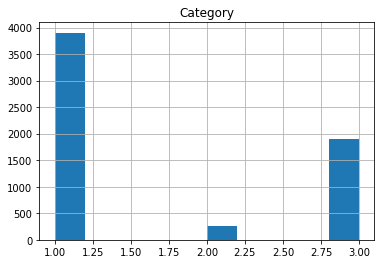

In [4]:
df.hist(column=['Category'])

In [5]:
X = df[['Text','Category']]
y = df['IsSpam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=X['Category'])

In [16]:
count_vectorizer =CountVectorizer(preprocessor=lambda x: re.sub(r'(\d[\d\.])+', '', x.lower()))
X_train_df = count_vectorizer.fit_transform(X_train['Text'].values)
X_test_df = count_vectorizer.transform(X_test['Text'].values)

In [15]:
#count_vectorizer.vocabulary_

#### Model selection

In [27]:
def test_model(model,name):
    model.fit(X_train_df, y_train) 
    print (name + " : ", accuracy_score(y_test,model.predict(X_test_df)))

In [31]:
model_arr = {
    "RandomForestClassifier":RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "MultinomialNB": MultinomialNB(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

In [32]:
for model in model_arr:    
    test_model(model_arr[model],model)

RandomForestClassifier :  0.969162995595
LogisticRegression :  0.988986784141
KNeighborsClassifier :  0.958149779736
MultinomialNB :  0.955947136564
AdaBoostClassifier :  0.98127753304


#### Model evaluating

In [33]:
model = LogisticRegression()
model.fit(X_train_df, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
predictions = model.predict(X_test_df)

In [36]:
print(classification_report(y_test, predictions, target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.99      0.99      0.99       623
       Spam       0.99      0.98      0.98       285

avg / total       0.99      0.99      0.99       908



In [40]:
#False Positive
X_test[y_test < predictions]['Text']

3960    From trivia@allthingsnewengland.com Fri Aug 23...
3933    From tesco.ie@crrvja.cjsias.uhbeqs.bounce.12hs...
3991    Received: from rs6000.resqnet.com (rs6000.resq...
540     From quinlan@pathname.com  Fri Aug 23 11:33:57...
Name: Text, dtype: object

In [39]:
#False Negative
X_test[y_test > predictions]['Text']

5493    From fork-admin@xent.com  Tue Aug  6 11:58:41 ...
4937    From ilug-admin@linux.ie  Tue Jul 30 10:52:20 ...
4306    From info@purplehotel.com  Wed Aug 28 10:45:50...
5041    From fork-admin@xent.com  Fri Aug  2 00:52:07 ...
4360    mv 00001.7848dde101aa985090474a91ec93fcf0 0000...
4656    From edum@hkem.com  Mon Jun 24 17:04:26 2002\n...
Name: Text, dtype: object